In [16]:
# Dataset download
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DownloadProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

""" 
    check if the data (zip) file is already downloaded
    if not, download it from "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" and save as cifar-10-python.tar.gz
"""
if not isfile('cifar-10-python.tar.gz'):
    with DownloadProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

CIFAR-10 Dataset: 171MB [02:00, 1.41MB/s]                                                                              


In [17]:
import tensorflow.compat.v1 as tf1
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

tf1.disable_v2_behavior()

In [2]:
with tf1.Session() as ses:

     # Build a graph.
     b = tf.constant([1,2,3,4])
     a = tf.constant([5,6,7,8])
     d = tf.concat(a,100)
     c = a * b

     # Evaluate the tensor `c`.
     print(ses.run(d))
     print(ses.run(c))

[5 6 7 8]
[ 5 12 21 32]


In [3]:
with tf1.Session() as ses:

     # Build a graph.
     
     
     d = tf.random.uniform([1000,20000],0,1)
     e = tf.random.uniform([1000,20000],0,7)
     # Evaluate the tensor `c`.
     c = d*e
     #print(ses.run(e))
     print(ses.run(c))

[[2.6439517  3.3262744  3.9636102  ... 0.20916662 0.21898986 1.5025325 ]
 [0.31596038 0.6885327  1.2450724  ... 2.3110125  5.8133802  2.4947898 ]
 [0.40197843 0.35446447 1.0978199  ... 0.42775014 2.5485468  5.242406  ]
 ...
 [3.1939027  0.7841267  0.13661718 ... 0.36210677 5.5797935  2.1544957 ]
 [0.17509204 2.2269726  0.24941932 ... 1.2521404  1.39434    3.8860443 ]
 [2.6458557  0.28626013 1.5157636  ... 4.415009   0.48471096 3.9149323 ]]


In [4]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt


cifar10_dataset_folder_path = 'cifar-10-batches-py'

In [5]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [7]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 999:
Image - Min Value: 1 Max Value: 238
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


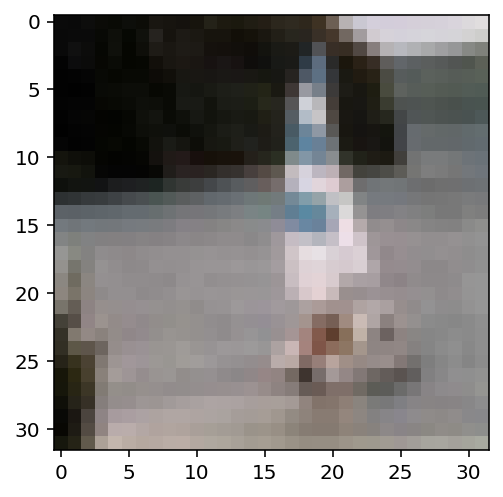

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 999
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [19]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [20]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [21]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

In [22]:
def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [23]:
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [24]:
import pickle

valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [25]:
# Remove previous weights, bias, inputs, etc..
from tensorflow.python.framework import ops
ops.reset_default_graph()
# Inputs
x =  tf1.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x')
y =  tf1.placeholder(tf.float32, shape=(None, 10), name='output_y')
keep_prob = tf1.placeholder(tf.float32, name='keep_prob')

In [26]:
#from keras.layers import Dropout

def fully_connected_layer():
    
    keep_prob=.2
    model=tf.keras.Sequential()
    
    #10
    model.add(layers.Dense(128,use_bias=True,input_shape=(2048,)))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    #model.add(Dropout(keep_prob))
    
    #11
    model.add(layers.Dense(256,use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    #model.add(Dropout(keep_prob))
    
    #12
    model.add(layers.Dense(512,use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    #model.add(Dropout(keep_prob))
    
    #13
    model.add(layers.Dense(1024,use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    #model.add(Dropout(keep_prob))
    
    #14
    model.add(layers.Dense(10,use_bias=True))
    
    
    return model

In [27]:
def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf1.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf1.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf1.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf1.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    print(conv1)
    conv1 = tf.nn.relu(conv1)
    print(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    print(conv1_pool)
    conv1_bn = tf1.layers.batch_normalization(conv1_pool)
    print(conv1_bn)
    

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf1.layers.batch_normalization(conv2_pool)
    
    print(conv2)
    print(conv2_pool)
    print(conv2_bn)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf1.layers.batch_normalization(conv3_pool)
    
    print(conv3)
    print(conv3_pool)
    print(conv3_bn)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf1.layers.batch_normalization(conv4_pool)
    
    print(conv4)
    print(conv4_pool)
    print("NITK")
    print(conv4_bn)
    
    # 9 Flatten
    
    ############################### From here Done by abhi. Check if working fine.
    print(" After flattening: ")
    flat = tf.reshape(conv4_bn, [tf.shape(conv4_bn)[0], -1]) 
    #flat=tf.keras.backend.flatten(conv4_bn)
    print(flat)
    print(tf.size(flat))
    
    # 10
    
    #full1 = tf1.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    #full1 = tf.nn.dropout(full1, keep_prob)
    #full1 = tf1.layers.batch_normalization(full1)
    
    # 11
    #full2 = tf1.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    #full2 = tf.nn.dropout(full2, keep_prob)
    #full2 = tf1.layers.batch_normalization(full2)
    
    # 12
    #full3 = tf1.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    #full3 = tf.nn.dropout(full3, keep_prob)
    #full3 = tf1.layers.batch_normalization(full3)    
    
    # 13
    #full4 = tf1.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    #full4 = tf.nn.dropout(full4, keep_prob)
    #full4 = tf1.layers.batch_normalization(full4)        
    
    # 14
    #out = tf1.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    #return out
    
    #NEW 10-14
    print("Entered fully connected layer")
    generator = fully_connected_layer()
    final_output = generator(flat, training=False)
    print(final_output)
    return final_output

In [28]:

epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [29]:
logits = conv_net(x, keep_prob)
print("logits=",logits)

Tensor("Conv2D:0", shape=(?, 32, 32, 64), dtype=float32)
Tensor("Relu:0", shape=(?, 32, 32, 64), dtype=float32)
Tensor("MaxPool:0", shape=(?, 16, 16, 64), dtype=float32)
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Tensor("batch_normalization/FusedBatchNorm:0", shape=(?, 16, 16, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 16, 16, 128), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("batch_normalization_1/FusedBatchNorm:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 8, 8, 256), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("batch_normalization_2/FusedBatchNorm:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("Relu_3:0", shape=(?, 4, 4, 512), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 2, 2, 512), dtype=float32)
N

In [30]:
model1 = tf.identity(logits, name='logits') # Name logits Tensor, so that can be loaded from disk after training

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [31]:
print(cost)
print(optimizer)
print(correct_pred)
print(accuracy)

Tensor("Mean:0", shape=(), dtype=float32)
name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/update_Variable_3/ApplyAdam"
input: "^Adam/update_batch_normalization/gamma/ApplyAdam"
input: "^Adam/update_batch_normalization/beta/ApplyAdam"
input: "^Adam/update_batch_normalization_1/gamma/ApplyAdam"
input: "^Adam/update_batch_normalization_1/beta/ApplyAdam"
input: "^Adam/update_batch_normalization_2/gamma/ApplyAdam"
input: "^Adam/update_batch_normalization_2/beta/ApplyAdam"
input: "^Adam/update_batch_normalization_3/gamma/ApplyAdam"
input: "^Adam/update_batch_normalization_3/beta/ApplyAdam"
input: "^Adam/update_dense/kernel/ResourceApplyAdam"
input: "^Adam/update_dense/bias/ResourceApplyAdam"
input: "^Adam/update_batch_normalization_4/gamma/ResourceApplyAdam"
input: "^Adam/update_batch_normalization_4/beta/ResourceApplyAdam"
input: "^Adam/update_dense_1/kernel/ResourceApplyAdam

In [32]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, 
                feed_dict={
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })

In [33]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: feature_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [34]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)

In [35]:
save_model_path = './image_classification'

print('Training...')
with tf1.Session() as sess:
    # Initializing the variables
    sess.run(tf1.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.8937 Validation Accuracy: 0.284000
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.4544 Validation Accuracy: 0.458400
Epoch  1, CIFAR-10 Batch 3:  Loss:     0.9563 Validation Accuracy: 0.509000
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.0215 Validation Accuracy: 0.547200
Epoch  1, CIFAR-10 Batch 5:  Loss:     0.8961 Validation Accuracy: 0.594800
Epoch  2, CIFAR-10 Batch 1:  Loss:     0.9587 Validation Accuracy: 0.606600
Epoch  2, CIFAR-10 Batch 2:  Loss:     0.7969 Validation Accuracy: 0.617000
Epoch  2, CIFAR-10 Batch 3:  Loss:     0.4300 Validation Accuracy: 0.655200
Epoch  2, CIFAR-10 Batch 4:  Loss:     0.5115 Validation Accuracy: 0.660200
Epoch  2, CIFAR-10 Batch 5:  Loss:     0.4061 Validation Accuracy: 0.683000
Epoch  3, CIFAR-10 Batch 1:  Loss:     0.5683 Validation Accuracy: 0.669000
Epoch  3, CIFAR-10 Batch 2:  Loss:     0.3998 Validation Accuracy: 0.685800
Epoch  3, CIFAR-10 Batch 3:  Loss:     0.1700 Validation Accuracy: 0.695000


In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

def display_image_predictions(features, labels, predictions, top_n_predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=top_n_predictions, ncols=2, figsize=(20, 10))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions
   
    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        if (image_i < top_n_predictions):
            pred_names = [label_names[pred_i] for pred_i in pred_indicies]
            correct_name = label_names[label_id]
            
            axies[image_i][0].imshow((feature*255).astype(np.int32, copy=False))
            axies[image_i][0].set_title(correct_name)
            axies[image_i][0].set_axis_off()

            axies[image_i][1].barh(ind + margin, pred_values[:3], width)
            axies[image_i][1].set_yticks(ind + margin)
            axies[image_i][1].set_yticklabels(pred_names[::-1])
            axies[image_i][1].set_xticks([0, 0.5, 1.0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7144705414012739



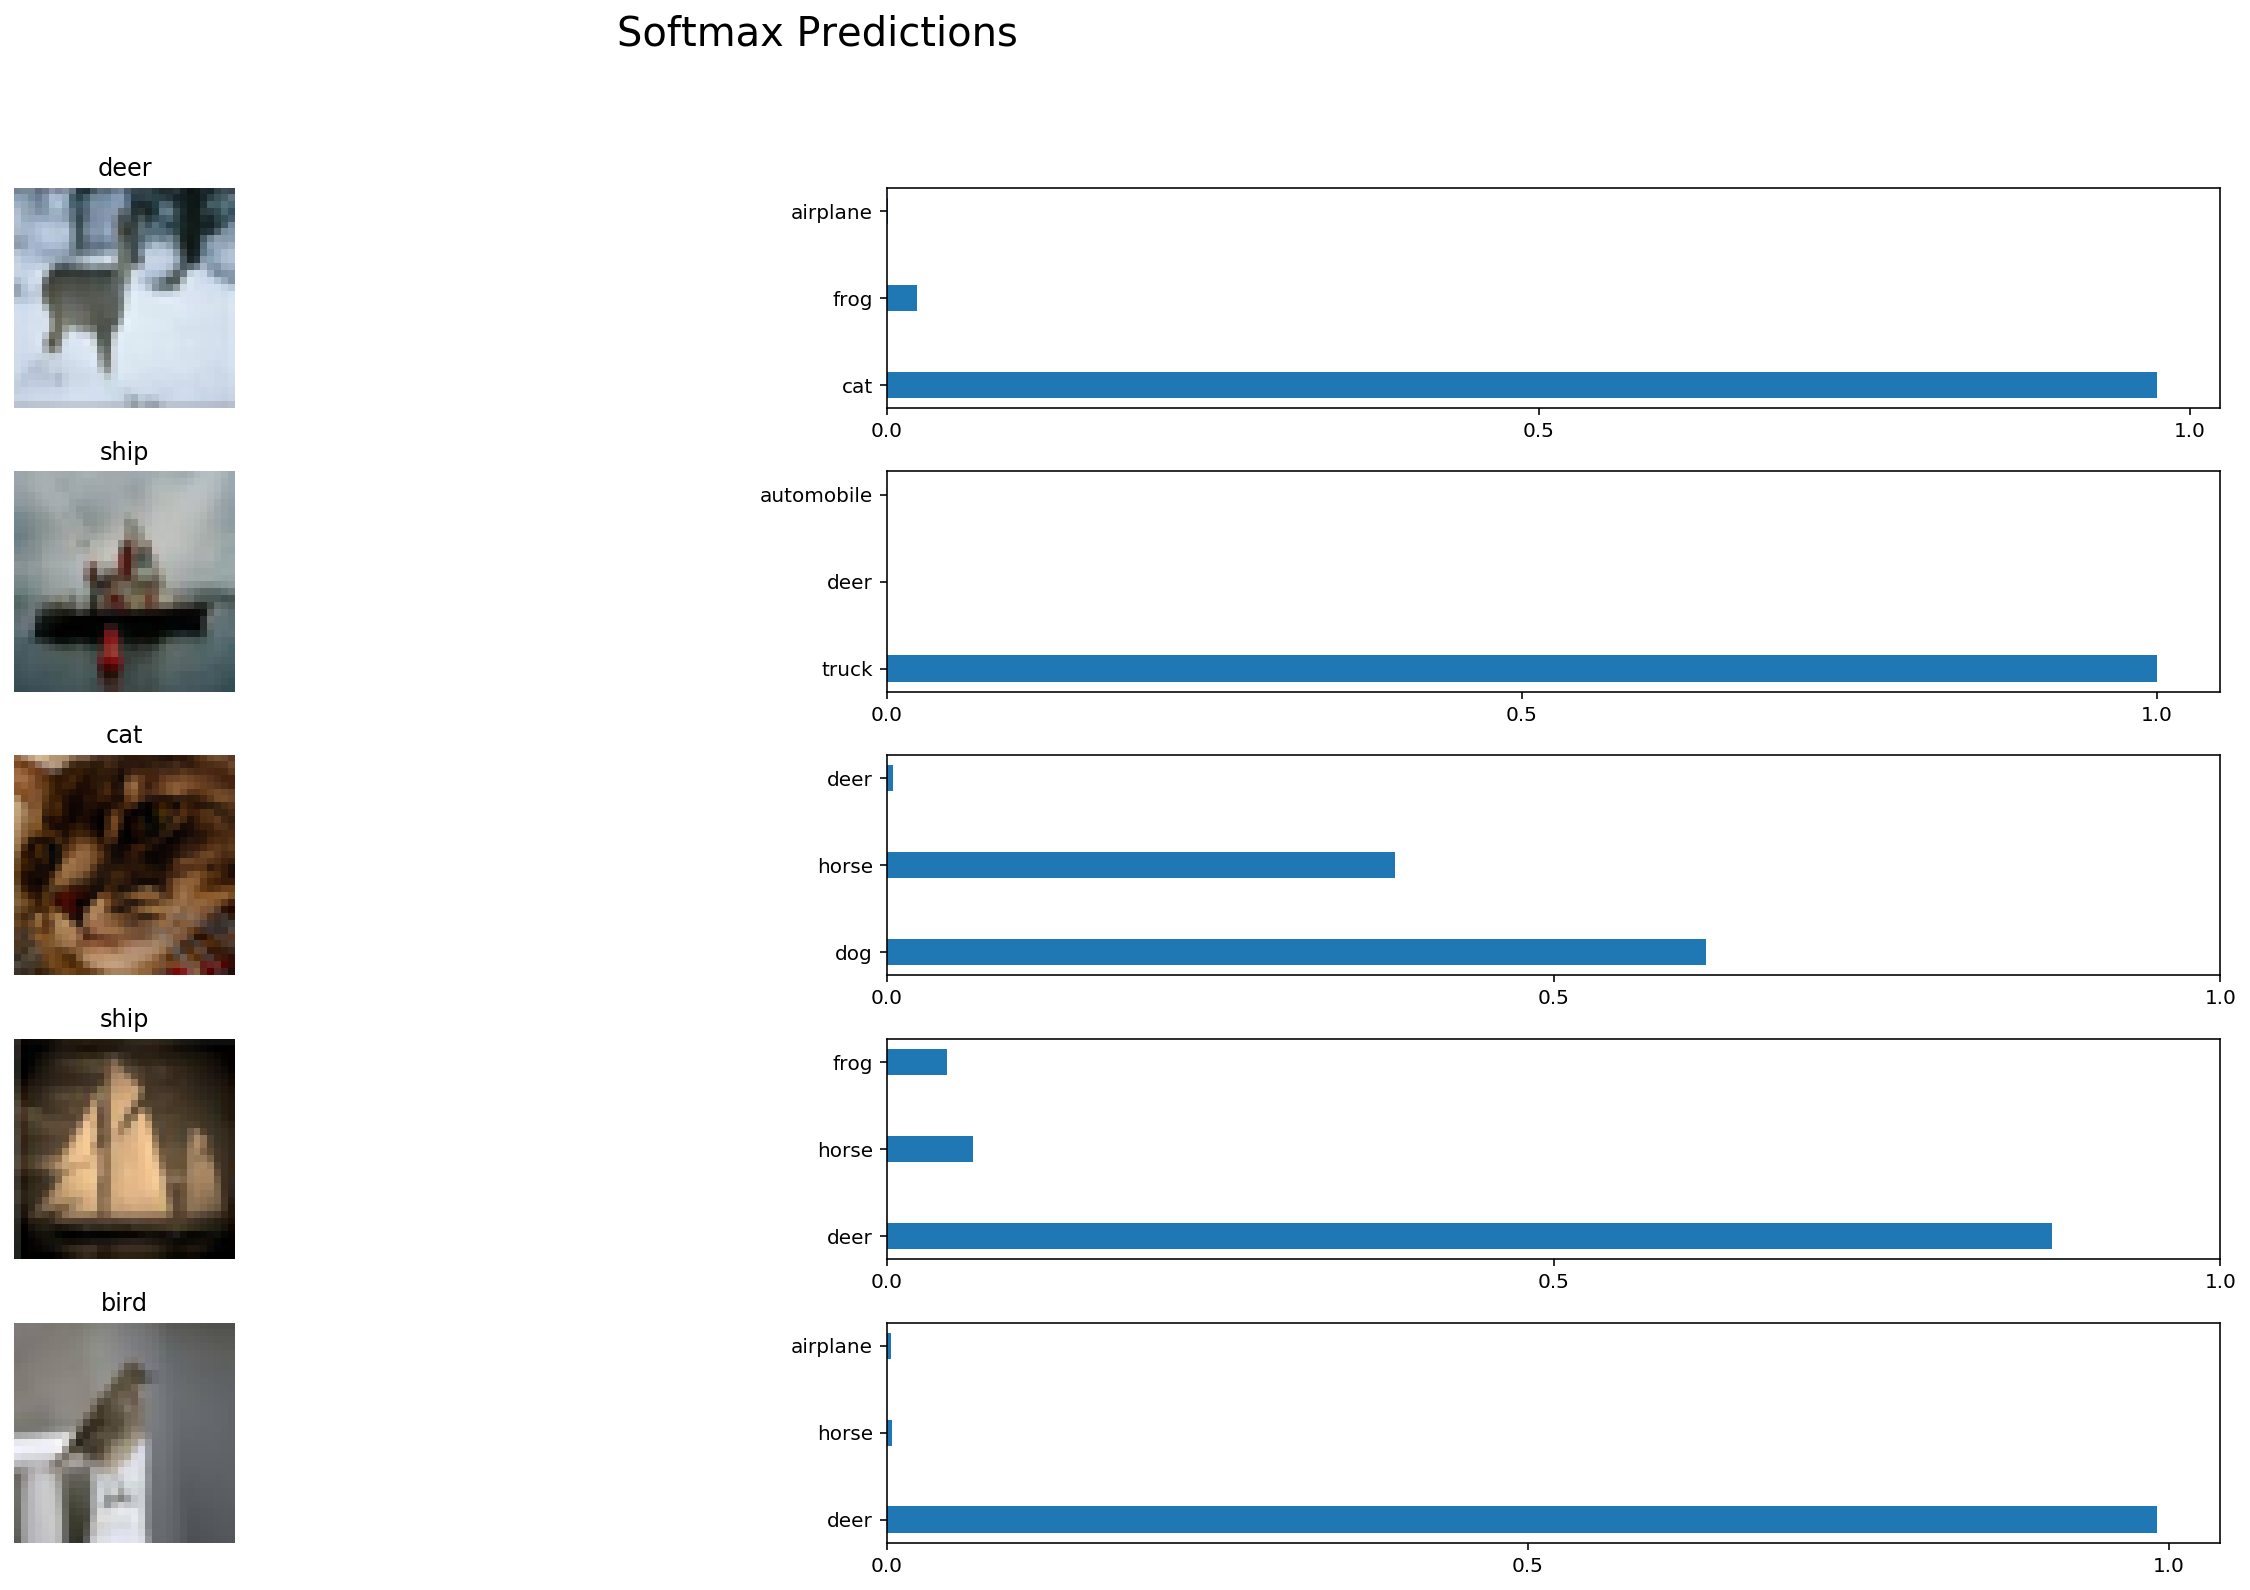

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import random

save_model_path = './image_classification'
batch_size = 64
n_samples = 10
top_n_predictions = 5

def test_model():
    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_x:0')
        loaded_y = loaded_graph.get_tensor_by_name('output_y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions, top_n_predictions)


test_model()